### from previous investigations we found some models that fared well with the task, and hyperparameters enabling them. 

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
sns.set_theme()
from sklearn.metrics import accuracy_score
from utils import get_data, get_param_combinations
import itertools
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [2]:
filename = "experiments_joined"

In [3]:
results = pd.read_csv(f"../results/{filename}.csv")
results['classifier_params'] = results['classifier_params'].str.replace("'", '"')
clf_params_df = results['classifier_params'].apply(json.loads)
clf_params_df = pd.json_normalize(clf_params_df)
results = pd.concat([results.drop(columns=['classifier_params']), clf_params_df], axis = 1)
results = results[results['n_features'] < 10]
results.drop(columns = ['random_state', 'n_jobs', 'probability', 'device'])

,feature_selector,feature_selector_params,classifier,n_features,accuracy,accuracy_std,accuracy_top_20pc,elapsed_time,n_estimators,learning_rate,...,kernel,degree,gamma,coef0,hidden_layer_sizes,activation,solver,alpha,learning_rate_init,max_iter
0,SelectFromModel,{'threshold': -Infinity},RandomForestClassifier,1,0.512200,0.018893,0.547000,2.910629,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SelectFromModel,{'threshold': -Infinity},RandomForestClassifier,1,0.513600,0.018959,0.540000,5.360588,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SelectFromModel,{'threshold': -Infinity},RandomForestClassifier,2,0.555200,0.008658,0.636000,2.910290,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SelectFromModel,{'threshold': -Infinity},RandomForestClassifier,2,0.550200,0.011444,0.643000,5.941307,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SelectFromModel,{'threshold': -Infinity},RandomForestClassifier,3,0.605200,0.006400,0.698000,3.210729,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13393,SelectFromModel,{'threshold': -Infinity},MLPClassifier,9,0.515000,0.006481,0.590000,1.296680,NaN,NaN,...,NaN,NaN,NaN,NaN,"[50, 50]",logistic,sgd,0.0001,0.001,500.0
13394,SelectFromModel,{'threshold': -Infinity},MLPClassifier,9,0.500333,0.000943,0.500000,1.050175,NaN,NaN,...,NaN,NaN,NaN,NaN,"[50, 50]",logistic,sgd,0.0001,0.010,500.0
13395,SelectFromModel,{'threshold': -Infinity},MLPClassifier,9,0.501000,0.000000,0.440000,1.831648,NaN,NaN,...,NaN,NaN,NaN,NaN,"[50, 50]",logistic,sgd,0.0001,0.100,500.0
13396,SelectFromModel,{'threshold': -Infinity},MLPClassifier,9,0.508333,0.016418,0.586667,1.180601,NaN,NaN,...,NaN,NaN,NaN,NaN,"[50, 50]",logistic,sgd,0.0010,0.001,500.0


In [4]:
results.sort_values('accuracy_top_20pc').groupby(['n_features', 'classifier']).first()

feature_selector  \
n_features classifier                                       
1          GradientBoostingClassifier         SelectKBest   
           LinearDiscriminantAnalysis         SelectKBest   
           MLPClassifier                  SelectFromModel   
           QuadraticDiscriminantAnalysis      SelectKBest   
           RandomForestClassifier         SelectFromModel   
           SVC                            SelectFromModel   
           XGBClassifier                  SelectFromModel   
2          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           SVC                            SelectFromModel   
           XGBClassifier                  SelectFromModel   
3          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           SVC                            SelectFromModel   
           XGBClassifier                  SelectFromModel   
4          GradientBoostingClassifier         SelectKBest   
           LinearDiscriminantAnalysis         SelectKBest   
           MLPClassifier                  SelectFromModel   
           QuadraticDiscriminantAnalysis      SelectKBest   
           RandomForestClassifier         SelectFromModel   
           SVC                                SelectKBest   
           XGBClassifier                  SelectFromModel   
5          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           SVC                            SelectFromModel   
           XGBClassifier                  SelectFromModel   
6          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           SVC                            SelectFromModel   
           XGBClassifier                  SelectFromModel   
7          GradientBoostingClassifier         SelectKBest   
           LinearDiscriminantAnalysis         SelectKBest   
           MLPClassifier                  SelectFromModel   
           QuadraticDiscriminantAnalysis      SelectKBest   
           RandomForestClassifier             SelectKBest   
           SVC                                SelectKBest   
           XGBClassifier                  SelectFromModel   
8          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           XGBClassifier                  SelectFromModel   
9          GradientBoostingClassifier     SelectFromModel   
           MLPClassifier                  SelectFromModel   
           RandomForestClassifier         SelectFromModel   
           XGBClassifier                  SelectFromModel   

                                                        feature_selector_params  \
n_features classifier                                                             
1          GradientBoostingClassifier               {'score_func': 'f_classif'}   
           LinearDiscriminantAnalysis     {'score_func': 'mutual_info_classif'}   
           MLPClassifier                               {'threshold': -Infinity}   
           QuadraticDiscriminantAnalysis  {'score_func': 'mutual_info_classif'}   
           RandomForestClassifier                      {'threshold': -Infinity}   
           SVC                                         {'threshold': -Infinity}   
           XGBClassifier                               {'threshold': -Infinity}   
2          GradientBoostingClassifier                  {'threshold': -Infinity}   
           MLPClassifier                               {'threshold': -Infinity}   
           Rando

### in ensembling, we plan on using SVM, XGBoost and NN (and maybe RF if it proves viable to ensemble it with XGB)

##### what hyperparameters are best for SVM vs n_features:

In [5]:
SVM_df = results[results['classifier'] == 'SVC']
SVM_best_df = SVM_df.sort_values('accuracy_top_20pc', ascending = False).groupby(['n_features']).first()
SVM_best_df[['accuracy', 'accuracy_top_20pc', 'kernel', 'degree', 'gamma', 'coef0', 'probability']]

,accuracy,accuracy_top_20pc,kernel,degree,gamma,coef0,probability
n_features,,,,,,,
1,0.5626,0.649,poly,5.0,auto,0.500,True
2,0.5990,0.703,poly,5.0,scale,0.125,True
3,0.6262,0.743,poly,3.0,scale,0.125,True
4,0.6322,0.767,poly,4.0,auto,0.000,True
5,0.3098,0.778,sigmoid,4.0,auto,1.000,True
6,0.2918,0.779,sigmoid,3.0,auto,1.000,True
7,0.5610,0.575,rbf,NaN,None,NaN,True


In [6]:
SVM_df.sort_values('accuracy_top_20pc').groupby(['n_features','kernel','degree', 'gamma', 'coef0']).first()

feature_selector  \
n_features kernel  degree gamma coef0                    
1          linear  3.0    auto  0.000  SelectFromModel   
                                0.125  SelectFromModel   
                                0.250  SelectFromModel   
                                0.500  SelectFromModel   
                                1.000  SelectFromModel   
...                                                ...   
6          sigmoid 5.0    scale 0.000  SelectFromModel   
                                0.125  SelectFromModel   
                                0.250  SelectFromModel   
                                0.500  SelectFromModel   
                                1.000  SelectFromModel   

                                        feature_selector_params classifier  \
n_features kernel  degree gamma coef0                                        
1          linear  3.0    auto  0.000  {'threshold': -Infinity}        SVC   
                                0.125  {'threshold': -Infinity}        SVC   
                                0.250  {'threshold': -Infinity}        SVC   
                                0.500  {'threshold': -Infinity}        SVC   
                                1.000  {'threshold': -Infinity}        SVC   
...                                                         ...        ...   
6          sigmoid 5.0    scale 0.000  {'threshold': -Infinity}        SVC   
                                0.125  {'threshold': -Infinity}        SVC   
                                0.250  {'threshold': -Infinity}        SVC   
                                0.500  {'threshold': -Infinity}        SVC   
                                1.000  {'threshold': -Infinity}        SVC   

                                       accuracy  accuracy_std  \
n_features kernel  degree gamma coef0                           
1          linear  3.0    auto  0.000    0.5226      0.010874   
                                0.125    0.5226      0.010874   
                                0.250    0.5226      0.010874   
                                0.500    0.5226      0.010874   
                                1.000    0.5226      0.010874   
...                                         ...           ...   
6          sigmoid 5.0    scale 0.000    0.5052      0.012797   
                                0.125    0.3804      0.017749   
                                0.250    0.3424      0.009604   
                                0.500    0.3250      0.009033   
                                1.000    0.2918      0.009108   

                                       accuracy_top_20pc  elapsed_time  \
n_features kernel  degree gamma coef0                                    
1          linear  3.0    auto  0.000              0.534      1.751950   
                                0.125              0.570      1.687638   
                                0.250              0.582      1.647275   
                                0.500              0.576      1.585839   
                                1.000              0.563      1.596089   
...                                                  ...           ...   
6          sigmoid 5.0    scale 0.000              0.645      2.376174   
                                0.125              0.735      2.367925   
                                0.250              0.756      2.142776   
                                0.500              0.774      2.083122   
                                1.000              0.777      2.433951   

                                       random_state  n_jobs  n_estimators  \
n_features kernel  degree gamma coef0                                       
1          linear  3.0    auto  0.000           NaN     NaN           NaN   
                                0.125           NaN     NaN           NaN   
                                0.250           NaN     NaN           NaN   
                                0.500           NaN     NaN           NaN 

### SVM models by kernel vs n_features
rbf seems to be the best

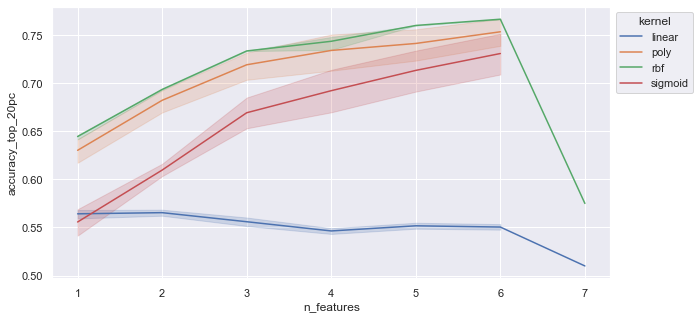

In [7]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=SVM_df,
    x="n_features",
    y="accuracy_top_20pc",
    hue="kernel",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### in ensembling, we will try SVM with poly, rbf or sigmoid kernel, linear is not suited for the task

# what hyperparameters are best for XGBoost

In [8]:
XGB_df = results[results['classifier'] == 'XGBClassifier']
XGB_best_df = XGB_df.sort_values('accuracy_top_20pc', ascending = False).groupby(['n_features']).first()
XGB_best_df[['accuracy', 'accuracy_top_20pc','n_estimators', 'learning_rate','booster','min_child_weight', 'max_depth', 'tree_method']]

,accuracy,accuracy_top_20pc,n_estimators,learning_rate,booster,min_child_weight,max_depth,tree_method
n_features,,,,,,,,
1,0.556000,0.673333,75.0,0.500,gbtree,5.0,2.0,hist
2,0.598333,0.715000,75.0,0.500,gbtree,3.0,2.0,hist
3,0.627667,0.753333,75.0,0.500,gbtree,3.0,2.0,hist
4,0.643667,0.766667,75.0,0.100,gbtree,0.5,2.0,approx
5,0.655667,0.776667,150.0,0.100,gbtree,1.0,2.0,approx
6,0.680000,0.790000,75.0,0.300,gbtree,5.0,2.0,approx
7,0.669333,0.791667,75.0,0.500,gbtree,3.0,2.0,approx
8,0.691667,0.790000,150.0,0.100,gbtree,0.5,2.0,approx
9,0.620333,0.705000,75.0,0.001,gbtree,0.5,6.0,approx


# what hyperparameters are best for NN

In [9]:
results.classifier.unique()

array(['RandomForestClassifier', 'GradientBoostingClassifier',
       'XGBClassifier', 'SVC', 'LinearDiscriminantAnalysis',
       'QuadraticDiscriminantAnalysis', 'MLPClassifier'], dtype=object)

In [10]:
NN_df = results[results['classifier'] == 'MLPClassifier']
NN_best_df = NN_df.sort_values('accuracy_top_20pc', ascending = False).groupby(['n_features']).first()
NN_best_df[['accuracy', 'accuracy_top_20pc','hidden_layer_sizes', 'activation', 'solver', 'alpha', 'learning_rate_init', 'max_iter']]

,accuracy,accuracy_top_20pc,hidden_layer_sizes,activation,solver,alpha,learning_rate_init,max_iter
n_features,,,,,,,,
1,0.561333,0.651667,"[10, 10, 10, 10]",tanh,sgd,0.0001,0.001,500.0
2,0.592000,0.706667,"[25, 25, 25]",relu,lbfgs,0.0100,0.001,500.0
3,0.627333,0.735000,"[15, 50, 15]",relu,sgd,0.0001,0.001,500.0
4,0.645667,0.760000,"[15, 50, 15]",tanh,sgd,0.0100,0.010,500.0
5,0.661667,0.773333,"[50, 50]",relu,adam,0.0010,0.100,500.0
6,0.691333,0.791667,"[25, 25, 25]",relu,sgd,0.0100,0.001,500.0
7,0.697000,0.785000,"[25, 25, 25]",relu,adam,0.0010,0.100,500.0
8,0.696000,0.778333,"[50, 50]",relu,sgd,0.0100,0.001,500.0
9,0.699000,0.778333,[100],relu,sgd,0.0001,0.001,500.0


# ensembling:

In [11]:
def score_function(proba, y_test, n_features):
    proba_1 = np.array([proba[:,1], y_test]).T
    proba_1 = proba_1[proba_1[:, 0].argsort()][::-1]
    top_20pc = proba_1[: int(len(proba_1) * 0.2)]
    score = sum(top_20pc[:,1]) * 10 * 1000/len(top_20pc) - n_features*200
    return score


def accuracy_top_20pc(proba, y_test):
    proba_1 = np.array([proba[:,1], y_test]).T
    proba_1 = proba_1[proba_1[:, 0].argsort()][::-1]
    top_20pc = proba_1[: int(len(proba_1) * 0.2)]
    acc_top_20pc = accuracy_score(top_20pc[:, 1], np.round(top_20pc[:, 0]))
    return acc_top_20pc

    

class Ensemble(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers_params):
        """
        Initialize the ensemble with classifiers and their parameters.
        Parameters:
        classifiers_params (list): List of tuples where each tuple is 
                                   (classifier_class, params_dict).
        """
        self.classifiers_params = classifiers_params
        self.classifiers = []
        self.probas = None

    def fit(self, X, y):
        """
        Fit all classifiers to the training data.

        Parameters:
        X (array-like): Training features.
        y (array-like): Training labels.
        """
        self.classifiers = []
        for clf_class, params in self.classifiers_params:
            clf = clf_class(**params)
            clf.fit(X, y)
            self.classifiers.append(clf)
        return self

    def predict_proba(self, X):
        """
        Predict class probabilities using soft voting.

        Parameters:
        X (array-like): Test features.

        Returns:
        dict: Dictionary of classifier class names and predicted probabilities.
        """
        self.probas = {clf.__class__.__name__: clf.predict_proba(X) for clf in self.classifiers}

        return self.probas

    def compare(self, X_test, y_test):
        """
        Compare all possible combinations of classifiers using a custom score function.

        Parameters:
        X (array-like): Test features.
        y (array-like): Test labels.

        Returns:
        DataFrame: Results with combination and custom score.
        """
        results = []
        self.predict_proba(X_test)
        classifier_names = list(self.probas.keys())
        n_classifiers = len(classifier_names)

        for r in range(1, n_classifiers + 1):
            for subset in itertools.combinations(classifier_names, r):
                probas = [self.probas[name] for name in subset]
                avg_proba = np.mean(probas, axis=0)
                score = score_function(avg_proba, y_test, X_test.shape[1])
                results.append({
                    'n_features': X_test.shape[1],
                    'Combination': subset,
                    'score': score,
                    'accuracy' : accuracy_score(np.round(avg_proba[:,1]).astype(int), y_test),
                    'accuracy_top_20pc' : accuracy_top_20pc(avg_proba, y_test)
                })

        return pd.DataFrame(results)


In [42]:
classifier_params1 = [
    (SVC, {'kernel' : 'poly',
           'degree' : 5,
           'gamma' : 'auto',
           'coef0' : 1/2,
           'probability' : True
           }),
    (XGBClassifier, {'n_estimators' : 75,
                     'learning_rate' : 0.5,
                     'booster' : 'gbtree',
                     'min_child_weight' : 5,
                     'max_depth' : 2,
                     'tree_method' : 'hist'
                     }),
    (MLPClassifier, {'hidden_layer_sizes' : [10,10,10,10],
                     'activation' : 'tanh',
                     'solver' : 'sgd',
                     'alpha' : 0.0001,
                     'learning_rate_init' : 0.001,
                     'max_iter' : 500})
]

In [41]:
SVM_best_df['coef0'][7] = 0
SVM_best_df['degree'][7] = 0
SVM_best_df['gamma'][7] = 'auto'
SVM_best_df[['kernel', 'degree', 'gamma', 'coef0', 'probability']]

C:\Users\mipec\AppData\Local\Temp\ipykernel_30836\2312190411.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  SVM_best_df['coef0'][7] = 0
C:\Users\mipec\AppData\Local\Temp\ipykernel_30836\2312190411.py:1: SettingWithCopyWarning: 
A value 

,kernel,degree,gamma,coef0,probability
n_features,,,,,
1,poly,5.0,auto,0.500,True
2,poly,5.0,scale,0.125,True
3,poly,3.0,scale,0.125,True
4,poly,4.0,auto,0.000,True
5,sigmoid,4.0,auto,1.000,True
6,sigmoid,3.0,auto,1.000,True
7,rbf,0.0,auto,0.000,True


In [35]:
XGB_best_df[['learning_rate','booster','min_child_weight', 'max_depth', 'tree_method']]

,learning_rate,booster,min_child_weight,max_depth,tree_method
n_features,,,,,
1,0.500,gbtree,5.0,2.0,hist
2,0.500,gbtree,3.0,2.0,hist
3,0.500,gbtree,3.0,2.0,hist
4,0.100,gbtree,0.5,2.0,approx
5,0.100,gbtree,1.0,2.0,approx
6,0.300,gbtree,5.0,2.0,approx
7,0.500,gbtree,3.0,2.0,approx
8,0.100,gbtree,0.5,2.0,approx
9,0.001,gbtree,0.5,6.0,approx


In [36]:
NN_best_df[['activation', 'solver', 'alpha', 'learning_rate_init', 'max_iter']]

,activation,solver,alpha,learning_rate_init,max_iter
n_features,,,,,
1,tanh,sgd,0.0001,0.001,500.0
2,relu,lbfgs,0.0100,0.001,500.0
3,relu,sgd,0.0001,0.001,500.0
4,tanh,sgd,0.0100,0.010,500.0
5,relu,adam,0.0010,0.100,500.0
6,relu,sgd,0.0100,0.001,500.0
7,relu,adam,0.0010,0.100,500.0
8,relu,sgd,0.0100,0.001,500.0
9,relu,sgd,0.0001,0.001,500.0


In [14]:
X, y = get_data()

In [15]:
features_by_importance = [105,100,101,102,103,104,8,113,2,391]

In [68]:
results = []
for r in range(42, 53, 1):
    ensemble = Ensemble(classifier_params1)
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, random_state=r, test_size=0.2)
    ensemble.fit(X_train, y_train)
    out = ensemble.compare(X_test, y_test)
    results.append(out)

In [69]:
results_df = pd.DataFrame()
for tmp in results:
    results_df = pd.concat([results_df, tmp])

In [ ]:
results_df.groupby('Combination').mean().sort_values('score', ascending = False)

,n_features,score,accuracy,accuracy_top_20pc
Combination,,,,
"(MLPClassifier,)",1.0,6022.727273,0.560818,0.622273
"(SVC,)",1.0,6113.636364,0.569273,0.631364
"(SVC, MLPClassifier)",1.0,6113.636364,0.569182,0.631364
"(SVC, XGBClassifier)",1.0,6059.090909,0.568636,0.625909
"(SVC, XGBClassifier, MLPClassifier)",1.0,6090.909091,0.569636,0.629091
"(XGBClassifier,)",1.0,6118.181818,0.553636,0.631818
"(XGBClassifier, MLPClassifier)",1.0,6095.454545,0.563636,0.629545


# automation

In [49]:
results = []
for n_features in range(1, 7, 1):
    X_features = X[:,features_by_importance[:n_features]]
    SVC_params = {'kernel' : SVM_best_df.iloc[n_features-1].kernel,
           'degree' : SVM_best_df.iloc[n_features-1].degree.astype(int),
           'gamma' : SVM_best_df.iloc[n_features-1].gamma,
           'coef0' : SVM_best_df.iloc[n_features-1].coef0,
           'probability' : True
           }
    XGB_params = {'n_estimators' : XGB_best_df.iloc[n_features-1].n_estimators.astype(int),
                     'learning_rate' : XGB_best_df.iloc[n_features-1].learning_rate,
                     'booster' : XGB_best_df.iloc[n_features-1].booster,
                     'min_child_weight' : XGB_best_df.iloc[n_features-1].min_child_weight.astype(int),
                     'max_depth' : XGB_best_df.iloc[n_features-1].max_depth.astype(int),
                     'tree_method' : XGB_best_df.iloc[n_features-1].tree_method
                     }

    MLP_params = {'hidden_layer_sizes' : NN_best_df.iloc[n_features-1].hidden_layer_sizes,
                     'activation' : NN_best_df.iloc[n_features-1].activation,
                     'solver' : NN_best_df.iloc[n_features-1].solver,
                     'alpha' : NN_best_df.iloc[n_features-1].alpha,
                     'learning_rate_init' : NN_best_df.iloc[n_features-1].learning_rate_init,
                     'max_iter' : NN_best_df.iloc[n_features-1].max_iter.astype(int)}
    classifier_params = [
    (SVC, SVC_params),
    (XGBClassifier, XGB_params),
    (MLPClassifier, MLP_params)
    ]
    for r in range(42, 53, 1):
       ensemble = Ensemble(classifier_params)
       X_train, X_test, y_train, y_test = train_test_split(X_features, y, random_state=r, test_size=0.2)
       ensemble.fit(X_train, y_train)
       out = ensemble.compare(X_test, y_test)
       results.append(out)

C:\Users\mipec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mipec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

In [50]:
results_df = pd.DataFrame()
for tmp in results:
    results_df = pd.concat([results_df, tmp])

In [53]:
results_df.groupby(['n_features', 'Combination']).mean().sort_values('score', ascending=False)

score  accuracy  \
n_features Combination                                                  
4          (SVC, XGBClassifier)                 6927.272727  0.660273   
           (SVC,)                               6900.000000  0.644727   
           (SVC, XGBClassifier, MLPClassifier)  6859.090909  0.666455   
           (SVC, MLPClassifier)                 6840.909091  0.662909   
5          (SVC, MLPClassifier)                 6836.363636  0.684909   
           (SVC,)                               6809.090909  0.684727   
           (SVC, XGBClassifier, MLPClassifier)  6786.363636  0.687455   
4          (XGBClassifier, MLPClassifier)       6786.363636  0.663909   
3          (SVC,)                               6781.818182  0.640455   
5          (XGBClassifier, MLPClassifier)       6781.818182  0.686091   
           (SVC, XGBClassifier)                 6772.727273  0.690364   
           (XGBClassifier,)                     6736.363636  0.679182   
4          (XGBClassifier,)                     6736.363636  0.659273   
3          (SVC, MLPClassifier)                 6718.181818  0.641182   
           (SVC, XGBClassifier, MLPClassifier)  6704.545455  0.642455   
5          (MLPClassifier,)                     6704.545455  0.674273   
4          (MLPClassifier,)                     6700.000000  0.660455   
2          (SVC,)                               6668.181818  0.612727   
3          (XGBClassifier, MLPClassifier)       6659.090909  0.640000   
           (MLPClassifier,)                     6650.000000  0.643000   
           (SVC, XGBClassifier)                 6645.454545  0.636182   
2          (SVC, MLPClassifier)                 6631.818182  0.608091   
6          (SVC, MLPClassifier)                 6613.636364  0.713818   
           (XGBClassifier,)                     6613.636364  0.699636   
           (XGBClassifier, MLPClassifier)       6600.000000  0.709364   
2          (SVC, XGBClassifier, MLPClassifier)  6600.000000  0.612091   
6          (SVC,)                               6581.818182  0.708909   
           (SVC, XGBClassifier, MLPClassifier)  6572.727273  0.713545   
2          (SVC, XGBClassifier)                 6568.181818  0.612909   
6          (MLPClassifier,)                     6540.909091  0.702818   
           (SVC, XGBClassifier)                 6536.363636  0.712727   
3          (XGBClassifier,)                     6527.272727  0.626545   
2          (XGBClassifier, MLPClassifier)       6495.454545  0.604000   
           (XGBClassifier,)                     6427.272727  0.599909   
           (MLPClassifier,)                     6404.545455  0.593455   
1          (SVC, MLPClassifier)                 6154.545455  0.569273   
           (XGBClassifier,)                     6118.181818  0.553636   
           (SVC,)                               6113.636364  0.569273   
           (XGBClassifier, MLPClassifier)       6113.636364  0.563091   
           (SVC, XGBClassifier, MLPClassifier)  6100.000000  0.569909   
           (SVC, XGBClassifier)                 6050.000000  0.568727   
           (MLPClassifier,)                     5913.636364  0.554000   

                                                accuracy_top_20pc  
n_features Combination                                             
4          (SVC, XGBClassifier)                          0.772727  
           (SVC,)                                        0.770000  
           (SVC, XGBClassifier, MLPClassifier)           0.765909  
           (SVC, MLPClassifier)                          0.764091  
5          (SVC, MLPClassifier)                          0.783636  
           (SVC,)                                        0.780909  
           (SVC, XGBClassifier, MLPClassifier)           0.778636  
4          (XGBClassifier, MLPClassifier)                0.758636  
3          (SVC,)                                        0.738182  
5          (XGBClassifier, MLPClassifier)                0.778182  
           (SVC, XGBClass

### 4 features, grid search for SVM + XGBoost

In [54]:
n_features = 4

KeyError: 3

In [55]:
SVC_params = {'kernel' : SVM_best_df.iloc[n_features-1].kernel,
           'degree' : SVM_best_df.iloc[n_features-1].degree.astype(int),
           'gamma' : SVM_best_df.iloc[n_features-1].gamma,
           'coef0' : SVM_best_df.iloc[n_features-1].coef0,
           'probability' : True
           }
XGB_params = {'n_estimators' : XGB_best_df.iloc[n_features-1].n_estimators.astype(int),
                    'learning_rate' : XGB_best_df.iloc[n_features-1].learning_rate,
                    'booster' : XGB_best_df.iloc[n_features-1].booster,
                    'min_child_weight' : XGB_best_df.iloc[n_features-1].min_child_weight.astype(int),
                    'max_depth' : XGB_best_df.iloc[n_features-1].max_depth.astype(int),
                    'tree_method' : XGB_best_df.iloc[n_features-1].tree_method
                    }

In [107]:
# results = pd.DataFrame()
classifiers = [
    (
        XGBClassifier,
        {
            "n_estimators": [150],
            "learning_rate": [0.001, 0.01],
            "min_child_weight" : [0, 1, 2, 3, 4],
            "subsample" : [1/2],
            "lambda" : [0.1, 0.5],
            "max_depth" : [2, 6, 8],
            "tree_method" : ['approx', 'hist']
        }
    ),
    (
        SVC,
        {
        "kernel" : ['poly'],
        "degree" : [3,4,5],
        "gamma" : ['auto'],
        "coef0" : [0.01, 0.2],
        "probability" : [True]
    }
    )
]
XGB, XGB_params = classifiers[0]
SVM, SVM_params = classifiers[1]
XGB_param_combinations = get_param_combinations(XGB_params)
SVM_param_combinations = get_param_combinations(SVM_params)
for XGB_param_set in XGB_param_combinations:
    for SVM_param_set in SVM_param_combinations:
        for k in range(42,53,1):
            ensemble = Ensemble([(XGB, XGB_param_set), (SVM, SVM_param_set)])
            X_train, X_test, y_train, y_test = train_test_split(X[:,features_by_importance[:n_features]], y, test_size=0.2)
            
            start = time.time()
            ensemble.fit(X_train, y_train)
            out = ensemble.compare(X_test, y_test)
            out['XGB_params'] = [XGB_param_set]*out.shape[0]
            out['SVM_params'] = [SVM_param_set]*out.shape[0]
            results = pd.concat([results, out])
            results.to_csv('../results/ensemble_grid_search.csv', index = False)
            print(out['score'])
        print(f"{start - time.time():.2f}s")

0    6100.0
1    6400.0
2    6500.0
Name: score, dtype: float64
0    6300.0
1    6850.0
2    6800.0
Name: score, dtype: float64
0    6000.0
1    7050.0
2    7050.0
Name: score, dtype: float64
0    5800.0
1    6250.0
2    6250.0
Name: score, dtype: float64
0    5200.0
1    6800.0
2    6800.0
Name: score, dtype: float64
0    6150.0
1    6700.0
2    6600.0
Name: score, dtype: float64
0    6750.0
1    7000.0
2    7000.0
Name: score, dtype: float64
0    6350.0
1    7250.0
2    7350.0
Name: score, dtype: float64
0    6150.0
1    6850.0
2    6900.0
Name: score, dtype: float64
0    6450.0
1    6900.0
2    6950.0
Name: score, dtype: float64
0    6000.0
1    7300.0
2    7400.0
Name: score, dtype: float64
-2.55s
0    5900.0
1    6800.0
2    6750.0
Name: score, dtype: float64
0    6050.0
1    6600.0
2    6500.0
Name: score, dtype: float64
0    6100.0
1    6700.0
2    6700.0
Name: score, dtype: float64
0    6650.0
1    7150.0
2    7150.0
Name: score, dtype: float64
0    5350.0
1    6750.0
2    6650

In [106]:
results.sort_values('score', ascending = False).head(20)

,n_features,Combination,score,accuracy,accuracy_top_20pc,XGB_params,SVM_params
2,4,"(XGBClassifier, SVC)",7700.0,0.672,0.850,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 5, 'gamma': 'auto..."
1,4,"(SVC,)",7700.0,0.673,0.850,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 4, 'gamma': 'auto..."
1,4,"(SVC,)",7700.0,0.680,0.850,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 3, 'gamma': 'scal..."
2,4,"(XGBClassifier, SVC)",7650.0,0.666,0.845,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 3, 'gamma': 'scal..."
1,4,"(SVC,)",7650.0,0.652,0.845,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 4, 'gamma': 'scal..."
1,4,"(SVC,)",7650.0,0.674,0.845,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 3, 'gamma': 'scal..."
1,4,"(SVC,)",7600.0,0.663,0.840,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 3, 'gamma': 'auto..."
2,4,"(XGBClassifier, SVC)",7600.0,0.665,0.840,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 3, 'gamma': 'scal..."
1,4,"(SVC,)",7600.0,0.659,0.840,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 5, 'gamma': 'auto..."
2,4,"(XGBClassifier, SVC)",7600.0,0.662,0.840,"{'n_estimators': 75, 'learning_rate': 0.01, 'm...","{'kernel': 'poly', 'degree': 4, 'gamma': 'scal..."


# top 3 models are run on more train/test splits for better evaluation

In [113]:
df = pd.read_csv('../results/ensemble_grid_search.csv')
grouped = df.groupby(['Combination', 'XGB_params', 'SVM_params']).agg(['mean', 'std'])
grouped.columns = ['_'.join(col) for col in grouped.columns]
top_3 = grouped.sort_values('score_mean', ascending=False).head(3)

# Extract the XGB_params and SVM_params for the top 3 rows
top_3_params = top_3.index.to_frame(index=False)[['XGB_params', 'SVM_params']]

In [116]:
XGB_param_sets = top_3_params['XGB_params']
SVM_param_sets = top_3_params['SVM_params']

(0    {'n_estimators': 150, 'learning_rate': 0.001, ...
 1    {'n_estimators': 75, 'learning_rate': 0.01, 'm...
 2    {'n_estimators': 75, 'learning_rate': 0.01, 'm...
 Name: XGB_params, dtype: object,
 0    {'kernel': 'poly', 'degree': 4, 'gamma': 'auto...
 1    {'kernel': 'poly', 'degree': 4, 'gamma': 'scal...
 2    {'kernel': 'poly', 'degree': 4, 'gamma': 'auto...
 Name: SVM_params, dtype: object)

In [135]:
XGB_params = [json.loads(i.replace("'", '"')) for i in XGB_param_sets]
SVM_params = [json.loads(i.replace("'", '"').replace('True', '"True"')) for i in SVM_param_sets]
for i in range(3):
    SVM_params[i]['probability'] = True

In [143]:
X_4 = X[:,features_by_importance[:n_features]]

In [148]:
results = pd.DataFrame()
for XGB_param_set, SVM_param_set in zip(XGB_params, SVM_params):
    for k in range(100):
        ensemble = Ensemble([(XGBClassifier, XGB_param_set), (SVC, SVM_param_set)])
        X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2)
        ensemble.fit(X_train, y_train)
        out = ensemble.compare(X_test, y_test)
        out['XGB_params'] = [XGB_param_set]*out.shape[0]
        out['SVM_params'] = [SVM_param_set]*out.shape[0]
        out['split_size'] = [0.2] * out.shape[0]
        results = pd.concat([results, out])
        results.to_csv('../results/final_ensembles.csv', index = False)
        print(k, 'first')
    for k in range(100):
        ensemble = Ensemble([(XGBClassifier, XGB_param_set), (SVC, SVM_param_set)])
        X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.35)
        ensemble.fit(X_train, y_train)
        out = ensemble.compare(X_test, y_test)
        out['XGB_params'] = [XGB_param_set]*out.shape[0]
        out['SVM_params'] = [SVM_param_set]*out.shape[0]
        out['split_size'] = [0.35] * out.shape[0]
        results = pd.concat([results, out])
        results.to_csv('../results/final_ensembles.csv', index = False)
        print(k, 'second')

0 first
1 first
2 first
3 first
4 first
5 first
6 first
7 first
8 first
9 first
10 first
11 first
12 first
13 first
14 first
15 first
16 first
17 first
18 first
19 first
20 first
21 first
22 first
23 first
24 first
25 first
26 first
27 first
28 first
29 first
30 first
31 first
32 first
33 first
34 first
35 first
36 first
37 first
38 first
39 first
40 first
41 first
42 first
43 first
44 first
45 first
46 first
47 first
48 first
49 first
50 first
51 first
52 first
53 first
54 first
55 first
56 first
57 first
58 first
59 first
60 first
61 first
62 first
63 first
64 first
65 first
66 first
67 first
68 first
69 first
70 first
71 first
72 first
73 first
74 first
75 first
76 first
77 first
78 first
79 first
80 first
81 first
82 first
83 first
84 first
85 first
86 first
87 first
88 first
89 first
90 first
91 first
92 first
93 first
94 first
95 first
96 first
97 first
98 first
99 first
0 second
1 second
2 second
3 second
4 second
5 second
6 second
7 second
8 second
9 second
10 second
11 second


In [149]:
features_by_importance = [105,100,101,102,103,104,8,113,2,391]
X_4 = X[:,features_by_importance[:n_features]]
results = pd.DataFrame()
for XGB_param_set, SVM_param_set in zip(XGB_params, SVM_params):
    for k in range(100):
        ensemble = Ensemble([(XGBClassifier, XGB_param_set), (SVC, SVM_param_set)])
        X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2)
        ensemble.fit(X_train, y_train)
        out = ensemble.compare(X_test, y_test)
        out['XGB_params'] = [XGB_param_set]*out.shape[0]
        out['SVM_params'] = [SVM_param_set]*out.shape[0]
        out['split_size'] = [0.2] * out.shape[0]
        results = pd.concat([results, out])
        results.to_csv('../results/final_ensembles_orig_features.csv', index = False)
        print(k, 'first')
    for k in range(100):
        ensemble = Ensemble([(XGBClassifier, XGB_param_set), (SVC, SVM_param_set)])
        X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.35)
        ensemble.fit(X_train, y_train)
        out = ensemble.compare(X_test, y_test)
        out['XGB_params'] = [XGB_param_set]*out.shape[0]
        out['SVM_params'] = [SVM_param_set]*out.shape[0]
        out['split_size'] = [0.35] * out.shape[0]
        results = pd.concat([results, out])
        results.to_csv('../results/final_ensembles_orig_features.csv', index = False)
        print(k, 'second')

0 first
1 first
2 first
3 first
4 first
5 first
6 first
7 first
8 first
9 first
10 first
11 first
12 first
13 first
14 first
15 first
16 first
17 first
18 first
19 first
20 first
21 first
22 first
23 first
24 first
25 first
26 first
27 first
28 first
29 first
30 first
31 first
32 first
33 first
34 first
35 first
36 first
37 first
38 first
39 first
40 first
41 first
42 first
43 first
44 first
45 first
46 first
47 first
48 first
49 first
50 first
51 first
52 first
53 first
54 first
55 first
56 first
57 first
58 first
59 first
60 first
61 first
62 first
63 first
64 first
65 first
66 first
67 first
68 first
69 first
70 first
71 first
72 first
73 first
74 first
75 first
76 first
77 first
78 first
79 first
80 first
81 first
82 first
83 first
84 first
85 first
86 first
87 first
88 first
89 first
90 first
91 first
92 first
93 first
94 first
95 first
96 first
97 first
98 first
99 first
0 second
1 second
2 second
3 second
4 second
5 second
6 second
7 second
8 second
9 second
10 second
11 second
